# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цели практической работы
1. Познакомиться с библиотекой matplotlib.
2. Потренирироваться выявлять аномалии в данных при помощи визуализации и обрабатывать их.
3. Потренироваться строить графики для количественных переменных.
4. Потренироваться строить графики для категориальных переменных.
5. Потренироваться выявлять зависимости в данных при помощи визуализации и формул.
6. Подготовить датафрейм к этапу генерации признаков.

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графика для количественных переменных.
4. Построить графика для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [2]:
# Ваш код здесь
df = pd.read_csv('vehicles_dataset_upd.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

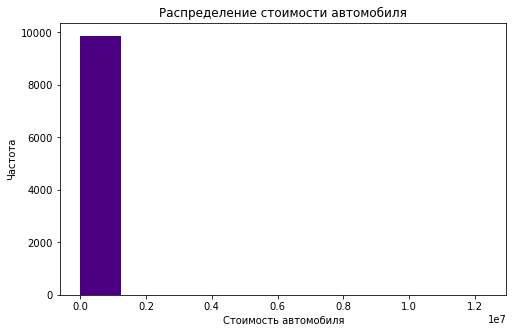

In [3]:
# Ваш код здесь
plt.figure(figsize=(8, 5))
plt.hist(df.price, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

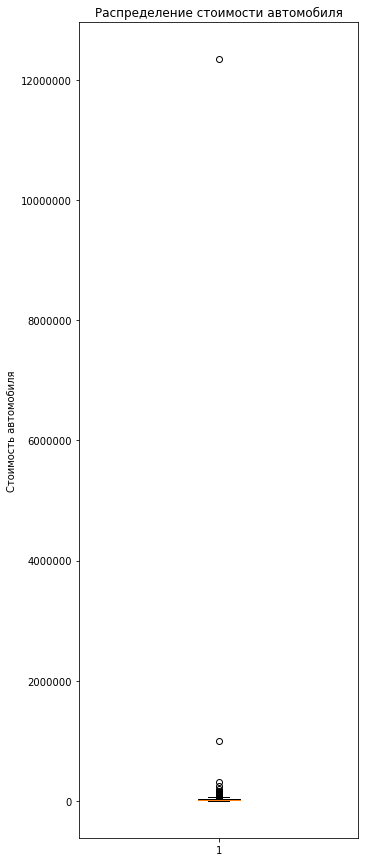

In [4]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(5,15))
ax.boxplot(df.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Распределение стоимости автомобиля')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [5]:
# Ваш код здесь
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [6]:
# Ваш код здесь
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries 


In [7]:
boundaries = calculate_outliers(df.price)
boundaries

(-22485.0, 58275.0)

6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [8]:
# Ваш код здесь
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1])
is_outlier.sum()

207

7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [9]:
# Ваш код здесь
df_sorted = df[is_outlier].sort_values(by=['price'])
df_sorted

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
934,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
5977,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00
4783,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00
8050,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
1253,7313450196,https://lasvegas.craigslist.org/ctd/d/salem-20...,las vegas,https://lasvegas.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,nv,44.927304,-123.030322,2021-04-27T11:29:39-0700,high,2021-04-27 18:29:39+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
290,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
5585,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [10]:
# Ваш код здесь
df_sorted.tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4073,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1674,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1995,other,cadvwrambuick,gas,283995,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9072,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
2963,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5076,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6471,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
8904,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4183,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8720,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9042,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

In [11]:
# Ваш код здесь
df_new = df.copy()
df_new = df_new[(df_new.price > boundaries[0]) & (df_new.price < boundaries[1])]
df_new.shape

(9661, 20)

### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [12]:
# Ваш код здесь
stats = df_new.groupby(['year'], as_index=False).agg({'price': 'mean'})
stats = stats.rename(columns={'price': 'mean_price'})
stats

,year,mean_price
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

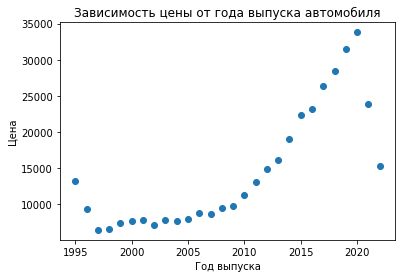

In [13]:
# Ваш код здесь
plt.figure()
plt.scatter(stats['year'], stats['mean_price'])
plt.title('Зависимость цены от года выпуска автомобиля')
plt.xlabel('Год выпуска')
plt.ylabel('Цена')

plt.show();

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [14]:
# Ваш код здесь
stats_1 = df_new.groupby(['year'], as_index=False)[['id']].count()
stats_1 = stats_1.rename(columns={'id': 'car_count'})
stats_1


,year,car_count
0,1995,419
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,78
6,2001,122
7,2002,149
8,2003,185
9,2004,208


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [15]:
# Ваш код здесь
df_new = df_new[df_new.year < 2021]
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00


5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [16]:
# Ваш код здесь
stats_1 = df_new.groupby(['year'], as_index=False).agg({'price': 'mean'})
stats_1 = stats_1.rename(columns={'price': 'mean_price'})
stats_1

,year,mean_price
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

Text(0.5, 1.0, 'Зависимость стоимости от года выпуска автомобиля')

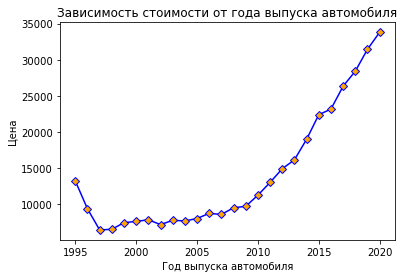

In [17]:
# Ваш код здесь
plt.plot(stats_1.year, stats_1.mean_price, color = 'blue', marker = 'D', markerfacecolor = 'orange')
plt.xlabel('Год выпуска автомобиля')
plt.ylabel('Цена')
plt.title('Зависимость стоимости от года выпуска автомобиля')

7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Линейная связь существует, однако она не ярко выражена. Так как значение не близко к 1

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: корреляция не сильная, так как значение не близка к 1

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: прямая, так как она положительная, цена растет с каждым годом.

In [18]:
# Ваш код здесь
df_new['price'].corr(df_new['year'])

0.5517189388950712

8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

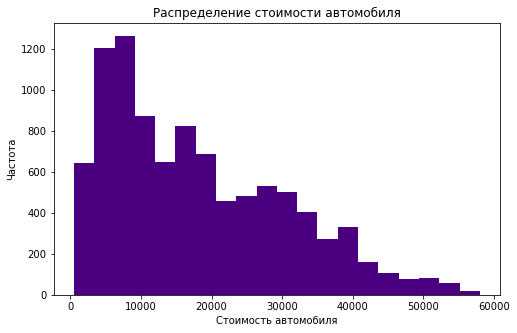

In [19]:
# Ваш код здесь
plt.figure(figsize=(8,5))
plt.hist(df_new.price, bins=20, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [22]:
# Ваш код здесь
df_new.to_csv('data/df_new.csv', index=False)


### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


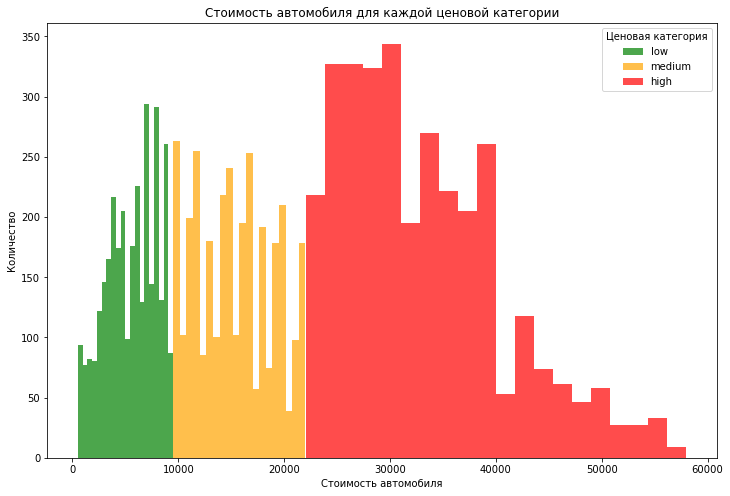

In [23]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors: 
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]
    
    ax.hist(data['price'], bins=20, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Стоимость автомобиля')
plt.title('Стоимость автомобиля для каждой ценовой категории')
plt.legend(colors, title='Ценовая категория');

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

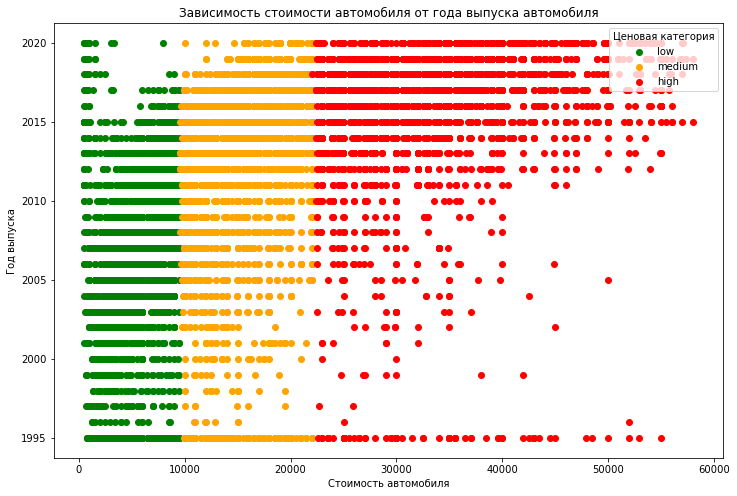

In [24]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors: 
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]
    
    ax.scatter(data['price'], data['year'], c=color, label=price_category)
    
ax.legend(loc='upper right', title='Ценовая категория')
plt.ylabel('Год выпуска')
plt.xlabel('Стоимость автомобиля')
plt.title('Зависимость стоимости автомобиля от года выпуска автомобиля')
plt.show()

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [25]:
# Ваш код здесь
stats_2 = df_new.groupby(['manufacturer'], as_index=False)[['id']].count()
stats_2 = stats_2.rename(columns={'id': 'car_count'})
stats_2

,manufacturer,car_count
0,acura,149
1,alfa-romeo,13
2,audi,193
3,bmw,307
4,buick,144
5,cadillac,176
6,chevrolet,1239
7,chrysler,159
8,datsun,2
9,dodge,321


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

Text(0.5, 1.0, 'Распределение производителей автомобиля')

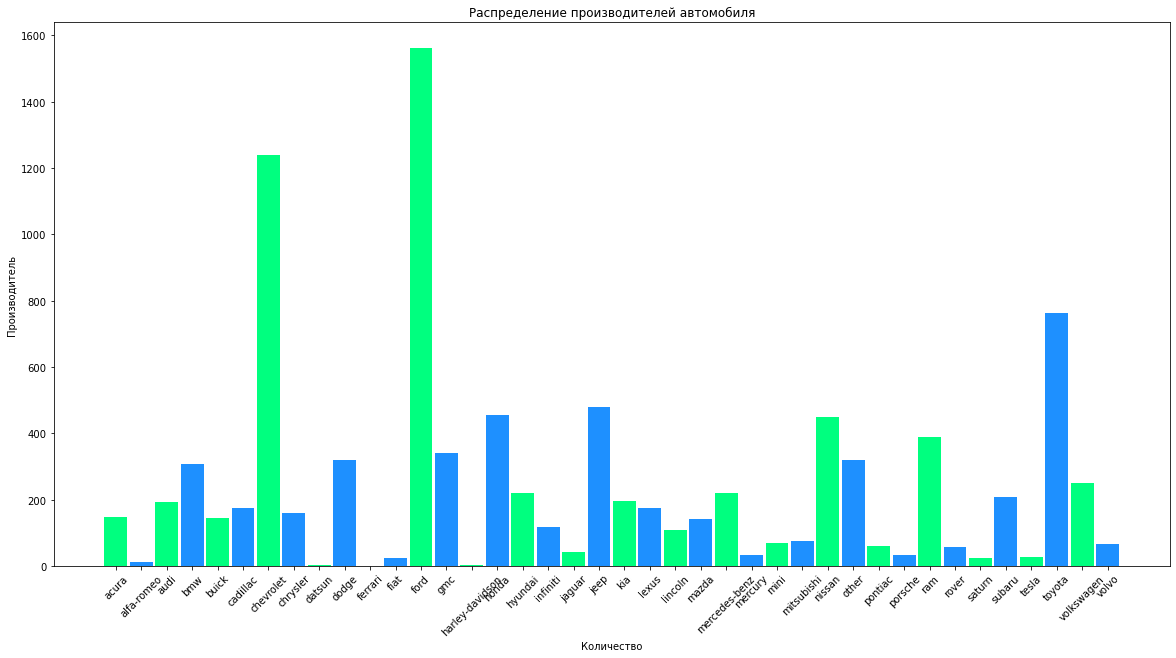

In [26]:
# Ваш код здесь
plt.figure(figsize=(20, 10))
plt.bar(stats_2['manufacturer'], stats_2['car_count'], width=0.9, color=['springgreen', 'dodgerblue'])
plt.xlabel('Количество')
plt.xticks(rotation = 45)
plt.ylabel('Производитель')
plt.title('Распределение производителей автомобиля')

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [27]:
# Ваш код здесь
stats_3 = df_new.groupby(['transmission'], as_index=False)[['id']].count()
stats_3 = stats_3.rename(columns={'id': 'car_count'})
stats_3

,transmission,car_count
0,automatic,7363
1,manual,612
2,other,1644


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


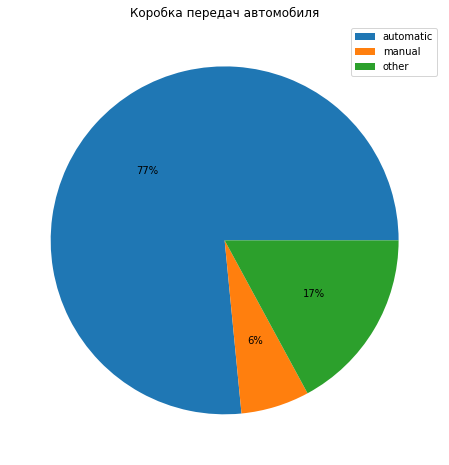

In [28]:
# Ваш код здесь
plt.figure(figsize=(12,8))
plt.pie(stats_3['car_count'], labels=stats_3['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title('Коробка передач автомобиля')
plt.legend()
plt.show();